Tarea 9.8 Francisco Avendaño

En clase vimos cómo ajustar una línea recta a un conjunto de datos cuando el error de todos los datos es el mismo. Repita el ejercicio para los siguientes datos (que tienen todos un error diferente):

|$x$|$f(x)$|$\sigma$|
|-|-|-|
|$0.1$|$5.71$|$0.2$|
|$0.2$|$7.21$|$0.3$|
|$0.3$|$8.07$|$0.2$|
|$0.4$|$9.73$|$0.4$|
|$0.5$|$10.06$|$0.05$|

Es decir, reescriba el sistema de ecuaciones a resolver tomando en cuenta que cada error es diferente. Luego resuélvalo.

¿Es un buen ajuste?

En este caso nuestro ajuste tendra $\sigma_i$, quedando de esta forma,
\begin{align}
\sum_i \hat{y}_i w_i = \sum_i (a_o + a_1 x_i) w_i \\
\sum_i \hat{y}_i x_i w_i = \sum_i x_i (a_o + a_1 x_i) w_i
\end{align}

Donde $w_i$ = $\dfrac{1}{\sigma_i^{2}}$

Definimos,

\begin{align}
\alpha_1 = \sum_i x_i w_i\\
\alpha_2 = \sum_i x_i^{2} w_i\\
\beta_1 = \sum_i \hat{y_i} w_i \\
\beta_2 = \sum_i \hat{y_i} x_i w_i
\end{align}

Por lo tanto,

\begin{align}
m_w a_0 + a_1 \alpha_1 = \beta_1\\
a_0 \alpha_1 + a_1 \alpha_2 = \beta_2
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#Usamos la función definida en clase
def lin_fit(puntos, sigma):
    # Pesos
    w = 1 / sigma**2
    
    #Calculamos terminos
    alpha1 = sum(w * puntos[:, 0])
    alpha2 = sum(w * puntos[:, 0]**2)
    beta1 = sum(w * puntos[:, 1])
    beta2 = sum(w * puntos[:, 0] * puntos[:, 1])
    m_w = sum(w)
    
    #Determinamos los coeficientes
    a0 = (alpha2 * beta1 - alpha1 * beta2) / (m_w * alpha2 - alpha1**2)
    a1 = (m_w * beta2 - alpha1 * beta1) / (m_w * alpha2 - alpha1**2)
    
    return a0, a1


In [ ]:
#Definimos los datos
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])       # Valores de x
y = np.array([5.71, 7.21, 8.07, 9.73, 10.06]) # Valores de f(x)
sigma = np.array([0.2, 0.3, 0.2, 0.4, 0.05])  # Errores

#Creamos la matriz con los datos
puntos = np.column_stack((x, y))

a0, a1 = lin_fit(puntos, sigma)


<ErrorbarContainer object of 3 artists>

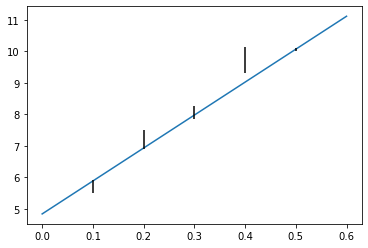

In [12]:
x = np.linspace(0, 0.6, 100)
plt.plot(x, a0 + a1*x)
plt.errorbar(puntos[:,0], puntos[:,1], yerr=sigma , color='black', linestyle='')